In [1]:
import os
import matplotlib.pyplot as plt

# EOReader
from eoreader.reader import Reader
from eoreader.bands import RED, GREEN, NDVI, YELLOW, CLOUDS, to_str

In [2]:
path = os.path.join("/home", "data", "DATA", "PRODS", "LANDSATS_COL2", "LC09_L1TP_200030_20220201_20220201_02_T1.tar")
reader = Reader()
prod = reader.open(path)
prod

eoreader.LandsatProduct 'LC09_L1TP_200030_20220201_20220201_02_T1'
Attributes:
	condensed_name: 20220201T104852_L9_200030_OLI_TIRS
	path: /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_20220201_20220201_02_T1.tar
	constellation: Landsat-9
	sensor type: Optical
	product type: L1
	default resolution: 30.0
	acquisition datetime: 2022-02-01T10:48:52
	band mapping:
		COASTAL_AEROSOL: 1
		BLUE: 2
		GREEN: 3
		RED: 4
		NIR: 5
		NARROW_NIR: 5
		CIRRUS: 9
		SWIR_1: 6
		SWIR_2: 7
		THERMAL_IR_1: 10
		THERMAL_IR_2: 11
		PANCHROMATIC: 8
	needs extraction: False
	cloud cover: 49.31
	tile name: 200030

/opt/conda/lib/python3.10/site-packages/rasterio/__init__.py:277: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/opt/conda/lib/python3.10/site-packages/rioxarray/_io.py:924: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


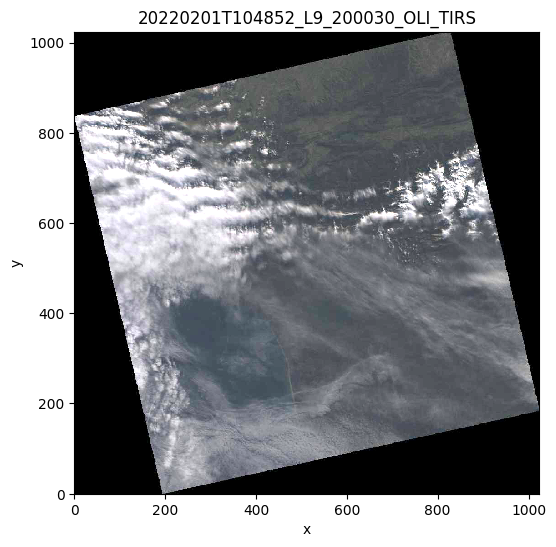

In [3]:
# Plot the quicklook
prod.plot()

In [4]:
# Get the band information
prod.bands

eoreader.SpectralBand 'Coastal aerosol'
Attributes:
	id: 1
	eoreader_name: COASTAL_AEROSOL
	common_name: coastal
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 440.0
	Bandwidth (nm): 20.0
	description: Coastal and aerosol studies
eoreader.SpectralBand 'Blue'
Attributes:
	id: 2
	eoreader_name: BLUE
	common_name: blue
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 480.0
	Bandwidth (nm): 60.0
	description: Bathymetric mapping, distinguishing soil from vegetation and deciduous from coniferous vegetation
eoreader.SpectralBand 'Green'
Attributes:
	id: 3
	eoreader_name: GREEN
	common_name: green
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 560.0
	Bandwidth (nm): 60.0
	description: Emphasizes peak vegetation, which is useful for assessing plant vigor
eoreader.SpectralBand 'Red'
Attributes:
	id: 4
	eoreader_name: RED
	common_name: red
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 655.0
	Bandwidth (nm): 30.0
	description: Discrim

In [5]:
# Some other information
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")
print(f"Landsat tile: {prod.tile_name}")

Acquisition datetime: 2022-02-01 10:48:52
Condensed name: 20220201T104852_L9_200030_OLI_TIRS
Landsat tile: 200030


In [6]:
# Retrieve the UTM CRS of the tile
prod.crs()

CRS.from_epsg(32630)

<AxesSubplot: >

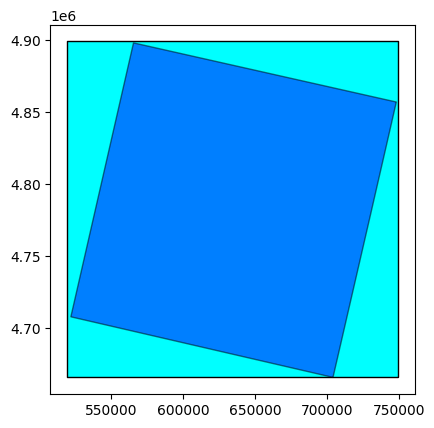

In [7]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()

base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [8]:
# Select some bands you want to load
bands = [GREEN, NDVI, YELLOW, CLOUDS]

# Be sure they exist for Landsat-9 OLI-TIRS sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))
# Landsat-9 OLI-TIRS doesn't provide YELLOW band

['GREEN', 'NDVI', 'CLOUDS']


In [9]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load(ok_bands)
band_dict[GREEN]

<xarray.DataArray 'GREEN' (band: 1, y: 7791, x: 7681)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
  * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
    spatial_ref  int64 0
Attributes:
    cleaning_method:   nodata
    long_name:         GREEN
    constellation:     Landsat-9
    constellation_id:  L9
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
    product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
    product_filename:  LC09_L1TP_200030_20220201_20220201_02_T1
    instrument:        OLI-TIRS
    product_type:      L1
    acquisition_date:  20220201T104852
    condensed_name:    20220201T104852_L9_200030_OLI_TIRS
    orbit_direction:   DESCENDING
    radiometry:        reflectance
    cloud_cover:       49.31

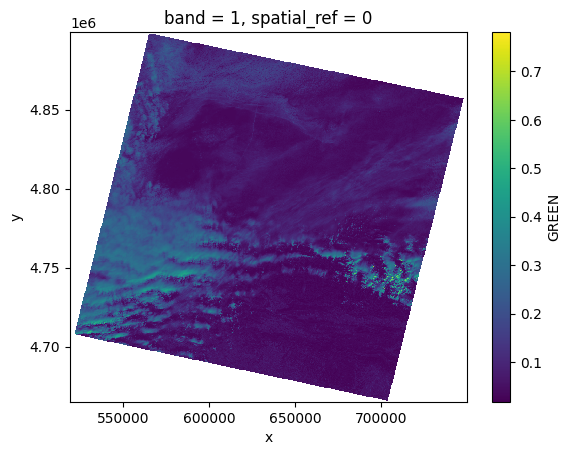

In [10]:
# The nan corresponds to the nodata you see on the footprint
# Plot a subsampled version
band_dict[GREEN][:, ::10, ::10].plot()

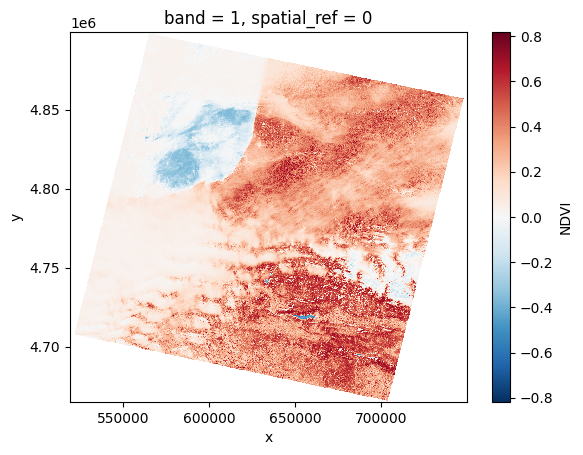

In [11]:
# Plot a subsampled version
band_dict[NDVI][:, ::10, ::10].plot()

In [12]:
# You can also stack those bands
stack = prod.stack(ok_bands)
stack

<xarray.DataArray 'GREEN_NDVI_CLOUDS' (z: 3, y: 7791, x: 7681)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
  * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
    spatial_ref  int64 0
  * z            (z) object MultiIndex
  * variable     (z) object 'GREEN' 'NDVI' 'CLOUDS'
  * band         (z) int64 1 1 1
Attributes:
    long_name:         GREEN NDVI CLOUDS
    constellation:     Landsat-9
    constellation_id:  L9
    product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
    product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
    product_filename:  LC09_L1TP_200030_20220201_20220201_02_T1
    instrument:        OLI-TIRS
    product_type:      L1
    acquisition_date:  20220201T104852
    condensed_name:    20220201T104852_L9_200030_OLI_TIRS
    orbit_direction:   DESCENDING
    cloud_cover:       49.31

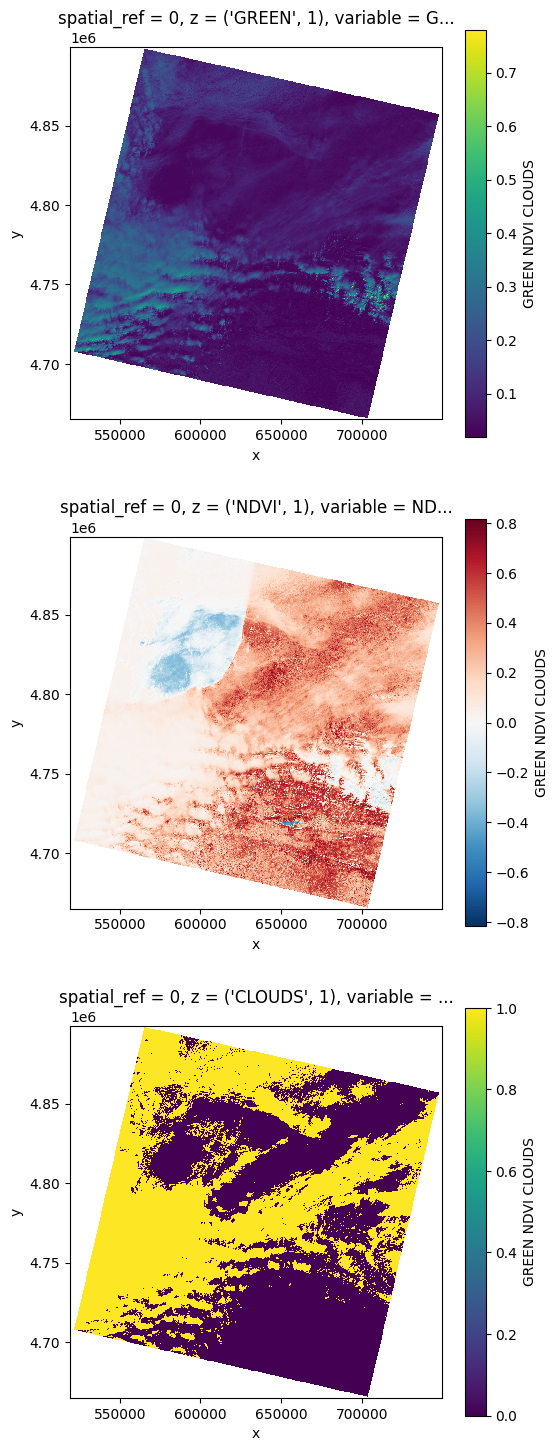

In [13]:
# Plot a subsampled version
nrows = len(stack)
fig, axes = plt.subplots(nrows=nrows, figsize=(2 * nrows, 6 * nrows), subplot_kw={"box_aspect": 1})  # Square plots
for i in range(nrows):
    stack[i, ::10, ::10].plot(x="x", y="y", ax=axes[i])


In [14]:
# Reflectance band
from eoreader.keywords import TO_REFLECTANCE
prod.load(RED, **{TO_REFLECTANCE: True})

{<SpectralBandNames.RED: 'RED'>: <xarray.DataArray 'RED' (band: 1, y: 7791, x: 7681)>
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
 Coordinates:
   * band         (band) int64 1
   * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
   * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
     spatial_ref  int64 0
 Attributes:
     AREA_OR_POINT:     Area
     cleaning_method:   nodata
     scale_factor:      1.0
     add_offset:        0.0
     long_name:         RED
     constellation:     Landsat-9
     constellation_id:  L9
     product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
     product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
     product_filename

In [15]:
# As is band
prod.load(RED, **{TO_REFLECTANCE: False})

{<SpectralBandNames.RED: 'RED'>: <xarray.DataArray 'RED' (band: 1, y: 7791, x: 7681)>
 array([[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
 Coordinates:
   * band         (band) int64 1
   * x            (x) float64 5.193e+05 5.193e+05 ... 7.497e+05 7.497e+05
   * y            (y) float64 4.899e+06 4.899e+06 ... 4.665e+06 4.665e+06
     spatial_ref  int64 0
 Attributes:
     AREA_OR_POINT:     Point
     scale_factor:      1.0
     add_offset:        0.0
     cleaning_method:   nodata
     long_name:         RED
     constellation:     Landsat-9
     constellation_id:  L9
     product_path:      /home/data/DATA/PRODS/LANDSATS_COL2/LC09_L1TP_200030_2...
     product_name:      LC09_L1TP_200030_20220201_20220201_02_T1
     product_filenam